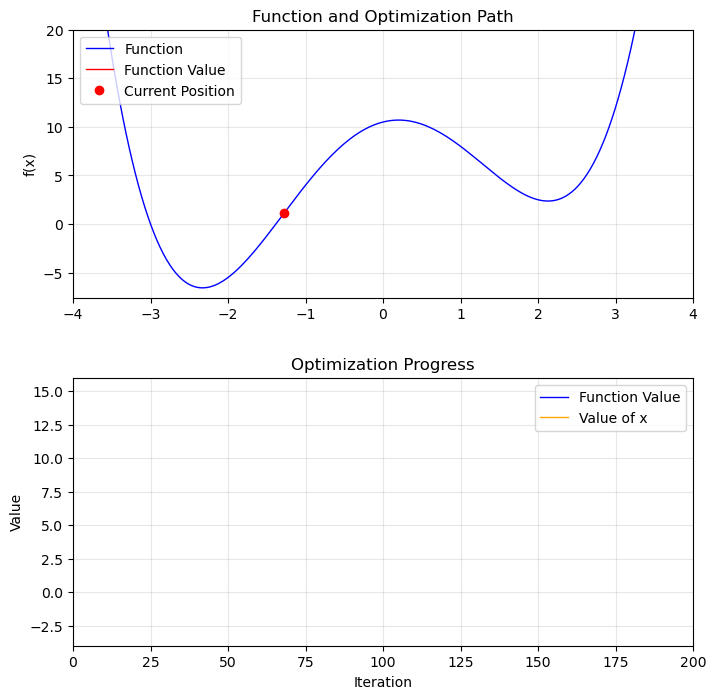

In [24]:
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def f(x):
    # Modified function to ensure global minimum is lower than local minimum
    return 0.5 * (x**4 - 10*x**2 + 13) + 2 * (x + 2)  # Added term to make left minimum lower

def run_optimization_with_momentum():
    x = torch.tensor(4.0, requires_grad=True)  # Start at x=4
    lr = 0.01
    momentum = torch.tensor(0.0)
    m = 0.99  # High momentum to escape local minimum
    
    x_values = []
    y_values = []
    
    for i in range(200):
        if x.grad is not None:
            x.grad.zero_()
        
        y = f(x)
        x_values.append(x.item())
        y_values.append(y.item())
        
        y.backward()
        
        with torch.no_grad():
            momentum = m * momentum + (1 - m) * x.grad
            x -= lr * momentum
            
    return x_values, y_values

# Get optimization values
x_values, y_values = run_optimization_with_momentum()

# Create figure and subplots with exact spacing
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plt.subplots_adjust(hspace=0.3)

# Top subplot
x_range = np.linspace(-4, 4, 200)
y_range = [f(float(x)) for x in x_range]

# Calculate proper y limits to see full function
min_y = min([f(float(x)) for x in x_range]) - 1  # Add padding
max_y = max([f(float(x)) for x in x_range]) + 1

# Plot function with matching style
ax1.plot(x_range, y_range, 'b-', label='Function', linewidth=1)
line1, = ax1.plot([], [], 'r-', label='Function Value', linewidth=1)
point1, = ax1.plot([], [], 'ro', label='Current Position', markersize=6)

# Set y limits to show full optimization path
ax1.set_ylim(min_y, 20)
ax1.set_xlim(-4, 4)
ax1.set_ylabel('f(x)')
ax1.set_title('Function and Optimization Path')
ax1.grid(True, alpha=0.3)
ax1.legend(ncol=1, loc='upper left')

# Bottom subplot with matching style
ax2.set_xlim(0, 200)
ax2.set_ylim(-4, 16)
line2, = ax2.plot([], [], 'b-', label='Function Value', linewidth=1)
line3, = ax2.plot([], [], 'orange', label='Value of x', linewidth=1)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Value')
ax2.set_title('Optimization Progress')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

def update(frame):
    # Update optimization path
    line1.set_data(x_values[:frame], [f(torch.tensor(x)) for x in x_values[:frame]])
    point1.set_data([x_values[frame-1]], [f(torch.tensor(x_values[frame-1]))])
    
    # Update value plots
    line2.set_data(range(frame), y_values[:frame])
    line3.set_data(range(frame), x_values[:frame])
    
    return line1, point1, line2, line3

# Create animation
anim = FuncAnimation(fig, update, frames=len(x_values),
                    interval=50, blit=True)

plt.show()

# Uncomment to save the animation
# anim.save('momentum_optimization_with_momentum.gif', writer='pillow', fps=30)